## Banking Customer Churn prediction using Logistic Regression, KNN, DTREE, Ensemble techniques

1. Domain Exploration
    - understanding the business process, how operations function on shop floor
    - interacting with stakeholders on shop floor, understanding business assumptions and customer behaviour
    - Understanding data sources, lifecycle of data
    

2. Data Collection and Data Exploration
    - collect relevant data from multiple sources, build a dataset
    - perform generic analysis on data to identify common issues with data
    

3. Data Cleaning
    - handle missing values
    - handle duplicated entries
    - handle outliers, unwanted columns
    
    
4. Feature Engineering
    - Feature Extraction
    - Exploratory Data ANalytics / Root Cause Analytics

        - Data Visualization
            - Univariate Analysis
            - Bivariate Analysis
            - Multivariate Analysis

        - Statistical Research
            - Correlation Analysis
            - ANOVA
            - Chi Square test
        
        
        
5. Preprocessing the features
    - Encoding the categoric attributes
    - Normalization of numeric attributes
    - separate whole dataset into train and test set
    
    
6. Apply Machine Learning
    - pick a learning algorithm
    - train the model
    
 
7. Performance Analysis
    - pick suitable metrics to assess performance of ML model
    
    
8. Optimization and Tuning
    - optimize the model, tune hyperparameters
    
    
9. Deployment
    - Export the trained model as object file
    - deploy the inferense pipeline as REST API service
    
    
10. Monitor performance of model in production
     - periodic data drift analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data collection and Exploration

In [2]:
df = pd.read_csv(r"D:\AI\data\datasets-1\Bank_churn_modelling.csv")
df.shape

(10000, 14)

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9985 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  9990 non-null   float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

RowNumber    CustomerId   CreditScore           Age       Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  9985.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800     5.013721   
std     2886.89568  7.193619e+04     96.653299     10.487806     2.892213   
min        1.00000  1.556570e+07    350.000000     18.000000     0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000     3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000     5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000     7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count      9990.000000  10000.000000  
mean     100127.441333      0.203700  
std       57497.228065      0.402769  
min          11.580000      0.000000  
25%       51112.885000      0.000000  
50%      100238.110000      0.000000  
75%      149400.922500      0.000000  
max      199992.480000      1.000000

Observations

    - unwanted data - RowNumber, CustomerId, Surname
    - financial capability - creditscore, balance, salary
    - relation with bank - Tenure, numofproducts, isactivemember
    - demographic info - age, gender, geography
    - target: Exited
    - Balance: at least 25% of customers have zero balance in their account

## 3. Data Cleaning

In [6]:
#check for duplicates
df.duplicated().sum()

0

In [7]:
# check for missing values
df.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure             15
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary    10
Exited              0
dtype: int64

In [8]:
df.skew()

C:\Users\admin\AppData\Local\Temp/ipykernel_3052/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010333
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.001322
Exited             1.471611
dtype: float64

In [9]:
# fill the missing vaues by mean
df.fillna(df.mean(),inplace=True)

C:\Users\admin\AppData\Local\Temp/ipykernel_3052/2910254006.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace=True)


In [10]:
# chekc for outliers
df.skew()

C:\Users\admin\AppData\Local\Temp/ipykernel_3052/1442525135.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010341
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.001323
Exited             1.471611
dtype: float64

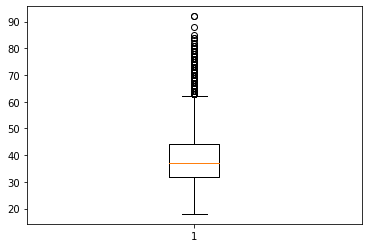

In [11]:
plt.boxplot(df.Age)
plt.show()

In [12]:
# we will clip top 2% of values of age 
thresh = df.Age.quantile(0.99)
df.Age[df.Age>thresh] = thresh

C:\Users\admin\AppData\Local\Temp/ipykernel_3052/2273061089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age[df.Age>thresh] = thresh


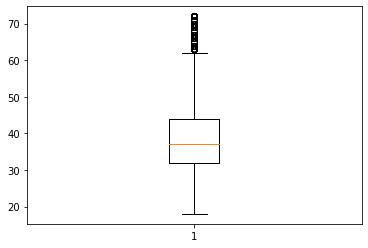

In [13]:
plt.boxplot(df.Age)
plt.show()

In [14]:
df.Age.skew()

0.9140946314454033

In [15]:
# drop some unwatned cols
df.drop(columns=['RowNumber','Surname','CustomerId'],inplace=True)
print(df.shape)

(10000, 11)


In [16]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42     2.0       0.00              1   
1          608     Spain  Female   41     1.0   83807.86              1   
2          502    France  Female   42     8.0  159660.80              3   
3          699    France  Female   39     1.0       0.00              2   
4          850     Spain  Female   43     2.0  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

## 4. Feature Engineering
### Feature Selection


### Statistical Research

#### Correlation Analysis

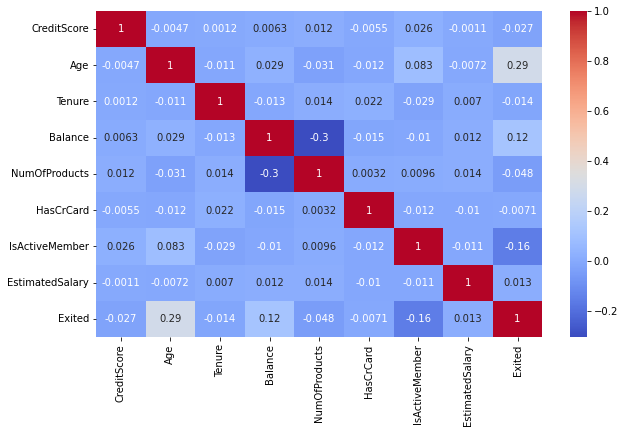

In [17]:
cor = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

## ANOVA = Analysis of Variance

    Use of anova (ftest) - it used to compare the variation (mean) of a numeric attribute across multiple groups


    Null Hypothesis = means of a numeric attribute across multiple categories are similar
    e.g. = mean of creditscore across Exited=0 amd exited=1 are similar

    
    To use any hypothesis testing technique, we have to select a confidence interval (business confidence), CI = 95%
    
    signficance level, alpha = 1 - CI = 1 - 0.95 = 0.05

When you apply ANOVA, you will get a pvalue

- if pvalue > alpha = we accept the null hypothesis, we accept that means are similar for multiple groups - not important
- if pvalue < alpha = we reject the null hypothesis, we agree that means are different for multiple groups - important


In [18]:
nums = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
cats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

In [19]:
xnum = df[nums]
xnum.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  EstimatedSalary
0          619   42     2.0       0.00              1        101348.88
1          608   41     1.0   83807.86              1        112542.58
2          502   42     8.0  159660.80              3        113931.57
3          699   39     1.0       0.00              2         93826.63
4          850   43     2.0  125510.82              1         79084.10

In [20]:
y = df.Exited
from sklearn.feature_selection import f_classif

fscore,pvalue = f_classif(xnum,y)
for i in range(len(nums)):print(nums[i],pvalue[i])

CreditScore 0.006738213892258643
Age 3.210618658489915e-194
Tenure 0.1565917661952313
Balance 1.275563319153163e-32
NumOfProducts 1.7173330048040421e-06
EstimatedSalary 0.21124537599025905


## Chi Square = for categoric data

    Use of chi square test - it used to compare the distribution of a categoric attribute (gender) across multiple groups (exited=0 and exited=1)


    Null Hypothesis = distribution of a categoric attribute across multiple categories are similar
    e.g. = distribution of Gender across Exited=0 amd exited=1 are similar

    
    To use any hypothesis testing technique, we have to select a confidence interval (business confidence), CI = 95%
    
    signficance level, alpha = 1 - CI = 1 - 0.95 = 0.05

When you apply ANOVA, you will get a pvalue

- if pvalue > alpha = we accept the null hypothesis, we accept that distributions are similar for multiple groups - not important
- if pvalue < alpha = we reject the null hypothesis, we agree that distributions are different for multiple groups - important


In [21]:
cats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
y = df.Exited
xcat = df[cats]
xcat.head()

Geography  Gender  HasCrCard  IsActiveMember
0    France  Female          1               1
1     Spain  Female          0               1
2    France  Female          1               0
3    France  Female          0               0
4     Spain  Female          1               1

In [22]:
from sklearn.preprocessing import LabelEncoder
xcat.Geography = LabelEncoder().fit_transform(xcat.Geography)
xcat.Gender = LabelEncoder().fit_transform(xcat.Gender)

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
xcat.head()

Geography  Gender  HasCrCard  IsActiveMember
0          0       0          1               1
1          2       0          0               1
2          0       0          1               0
3          0       0          0               0
4          2       0          1               1

In [24]:
from sklearn.feature_selection import chi2
chiscore,pvalue = chi2(xcat,y)
for i in range(len(cats)):print(cats[i],pvalue[i])

Geography 0.0005756078382573235
Gender 7.015574513879596e-13
HasCrCard 0.6984962089530451
IsActiveMember 1.5680362405434552e-27


In [25]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [26]:
## Feature selection
x = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Balance',
       'NumOfProducts','IsActiveMember']]
y = df.Exited

## 5. Preprocessing of features

In [27]:
x.head()

CreditScore Geography  Gender  Age    Balance  NumOfProducts  \
0          619    France  Female   42       0.00              1   
1          608     Spain  Female   41   83807.86              1   
2          502    France  Female   42  159660.80              3   
3          699    France  Female   39       0.00              2   
4          850     Spain  Female   43  125510.82              1   

   IsActiveMember  
0               1  
1               1  
2               0  
3               0  
4               1

    For nominal attributes with 2 categories: LabelEncoder / ordinalEncoder / OneHotEncoder
    For nominal attribute with 2+ categories: OneHotEncoder (use drop=first)
    For ordinal attribute: OrdinalEncoder

In [28]:
# working of onehotencoding
pd.get_dummies(df.Geography)

France  Germany  Spain
0          1        0      0
1          0        0      1
2          1        0      0
3          1        0      0
4          0        0      1
...      ...      ...    ...
9995       1        0      0
9996       1        0      0
9997       1        0      0
9998       0        1      0
9999       1        0      0

[10000 rows x 3 columns]

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

transformer = ColumnTransformer([("ohe",OneHotEncoder(drop='first'),[1,2]),('sc',StandardScaler(),[0,3,4,5])],
                                remainder='passthrough')

transformer.fit(x)
x2 = pd.DataFrame(transformer.transform(x))
x2.head()

0    1    2         3         4         5         6    7
0  0.0  0.0  0.0 -0.326221  0.301467 -1.225848 -0.911583  1.0
1  0.0  1.0  0.0 -0.440036  0.204793  0.117350 -0.911583  1.0
2  0.0  0.0  0.0 -1.536794  0.301467  1.333053  2.527057  0.0
3  0.0  0.0  0.0  0.501521  0.011446 -1.225848  0.807737  0.0
4  0.0  1.0  0.0  2.063884  0.398140  0.785728 -0.911583  1.0

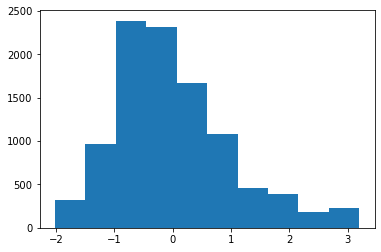

In [30]:
plt.hist(x2.iloc[:,4])
plt.show()

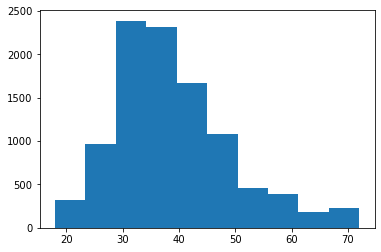

In [31]:
plt.hist(x.iloc[:,3])
plt.show()

In [32]:
# train test split
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x2,y,test_size=0.2,random_state=3,stratify=y)
print(x2.shape,xtr.shape,xts.shape)
print(y.shape,ytr.shape,yts.shape)

(10000, 8) (8000, 8) (2000, 8)
(10000,) (8000,) (2000,)


## 6. Apply Machine Learning

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# train the model using train data
model.fit(xtr,ytr)

LogisticRegression()

## 7. Performance Analysis

In [34]:
# creditscore = 650, age = 48, gender = 'female', iam = 1, nop = 3, bal = 245100

newcust = [[650,'France','Female',48,245100,3,1]]
newcust = transformer.transform(newcust)
model.predict(newcust)

array([0], dtype=int64)

In [35]:
# accuracy of mdoel on test data
# get predictions on test data
ypred = model.predict(xts)

from sklearn import metrics

metrics.accuracy_score(yts,ypred)

0.815

In [36]:
# recall
metrics.recall_score(yts,ypred)

0.2334152334152334

In [37]:
metrics.precision_score(yts,ypred)

0.6209150326797386

In [38]:
metrics.f1_score(yts,ypred)

0.33928571428571425

In [39]:
metrics.confusion_matrix(yts,ypred)

array([[1535,   58],
       [ 312,   95]], dtype=int64)

In [40]:
print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.62      0.23      0.34       407

    accuracy                           0.81      2000
   macro avg       0.73      0.60      0.62      2000
weighted avg       0.79      0.81      0.78      2000



## Predictions with KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=3)
# train the model
model2.fit(xtr,ytr)

KNeighborsClassifier(n_neighbors=3)

In [42]:
# creditscore = 650, age = 48, gender = 'female', iam = 1, nop = 3, bal = 245100

newcust = [[650,'France','Female',48,245100,3,1]]
newcust = transformer.transform(newcust)
model2.predict(newcust)

array([1], dtype=int64)

In [43]:
# accuracy of mdoel on test data
# get predictions on test data
ypred = model2.predict(xts)

from sklearn import metrics

metrics.accuracy_score(yts,ypred)

0.8455

In [44]:
print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.65      0.53      0.58       407

    accuracy                           0.85      2000
   macro avg       0.77      0.73      0.74      2000
weighted avg       0.84      0.85      0.84      2000



## Decision Tree for classification

In [45]:
from sklearn import tree

In [46]:
model3 = tree.DecisionTreeClassifier(criterion='entropy',random_state=3)
model3.fit(xtr,ytr)

DecisionTreeClassifier(criterion='entropy', random_state=3)

In [102]:
# creditscore = 650, age = 48, gender = 'female', iam = 1, nop = 3, bal = 245100

newcust = [[650,'France','Female',48,245100,3,1]]
newcust = transformer.transform(newcust)
print(newcust)
model3.predict(newcust)

[[0.0 0.0 0.0 650 48 245100 3 1]]


array([1], dtype=int64)

In [48]:
# accuracy of mdoel on test data
# get predictions on test data
ypred = model3.predict(xts)

from sklearn import metrics

metrics.accuracy_score(yts,ypred)

0.8025

In [49]:
# performance on test data
ypred = model3.predict(xts)
print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1593
           1       0.51      0.53      0.52       407

    accuracy                           0.80      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.81      0.80      0.80      2000



In [50]:
# performance on train data
ypred = model3.predict(xtr)
print(metrics.classification_report(ytr,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [51]:
model4 = tree.DecisionTreeClassifier(criterion='entropy',random_state=3,
                                    max_depth=10,min_samples_leaf=5,
                                    min_samples_split=60)
model4.fit(xtr,ytr)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=60, random_state=3)

In [52]:
# performance on test data
ypred = model4.predict(xts)
print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1593
           1       0.74      0.50      0.60       407

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [53]:
# performance on train data
ypred = model4.predict(xtr)
print(metrics.classification_report(ytr,ypred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      6370
           1       0.79      0.52      0.63      1630

    accuracy                           0.87      8000
   macro avg       0.84      0.74      0.78      8000
weighted avg       0.87      0.87      0.86      8000



#### Overfitting

    - performance of model on train data = high
    - performance of model on test data = low
    
    
#### Why overfitting occurs?
    - presence of noisy features, noisy observations
    - lack of sample size (less data)
    - learning algorithm choosen is way more complex than needed
    
    
#### How to deal with overfitting?
    - drop some unwanted features, less relevant features
    - collect more data - rows, no need to collect more columns
    - try slightly less complex learning algorithm
    - for decision tree try decreasing the values of max parameters (max_depth, max_leaf_nodes), increasing values of min parameters such as min_samples_leaf, min_samples_split

### Underfitting
    - performance of model on train data = low
    - performance of model on test data = low
    
#### Why underfitting occurs?
    - presence of noisy observation
    - lack of informative features
    - learning algorithm choosen is less efficient
    
    
#### How to deal with underfitting?
    - drop some noisy rows
    - collect more features- columns, no need to get more rows
    - try polynomial version of features,convert numeric to categoric
    - try more efficient/complex learning algorithm
    - for decision tree try increasing the values of max parameters (max_depth, max_leaf_nodes), decreasing values of min parameters such as min_samples_leaf, min_samples_split

## Hyperparameter tuning wtih GridSearch

In [54]:
params = {"max_depth":np.arange(5,20,2),
          "min_samples_leaf":np.arange(5,50,3),
          "min_samples_split":np.arange(10,90,10)}

In [55]:
params

{'max_depth': array([ 5,  7,  9, 11, 13, 15, 17, 19]),
 'min_samples_leaf': array([ 5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47]),
 'min_samples_split': array([10, 20, 30, 40, 50, 60, 70, 80])}

In [56]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(tree.DecisionTreeClassifier(criterion='gini',random_state=3,class_weight='balanced'),
                     param_grid=params,scoring='f1',n_jobs=-1,verbose=True,cv=5)

In [57]:
search.fit(x2,y)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=3),
             n_jobs=-1,
             param_grid={'max_depth': array([ 5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_leaf': array([ 5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47]),
                         'min_samples_split': array([10, 20, 30, 40, 50, 60, 70, 80])},
             scoring='f1', verbose=True)

In [58]:
search.best_score_

0.5920109484488923

In [59]:
search.best_params_

{'max_depth': 9, 'min_samples_leaf': 35, 'min_samples_split': 10}

### Visualizing decision tree

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer([("ohe",OneHotEncoder(drop='first'),[1,2]),],
                                remainder='passthrough')

transformer.fit(x)
x2 = pd.DataFrame(transformer.transform(x))


# train test split
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x2,y,test_size=0.2,random_state=3,stratify=y)

In [61]:
model5 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_leaf=20,
                                    max_leaf_nodes=150,min_samples_split=50)
model5.fit(xtr,ytr)

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=150,
                       min_samples_leaf=20, min_samples_split=50)

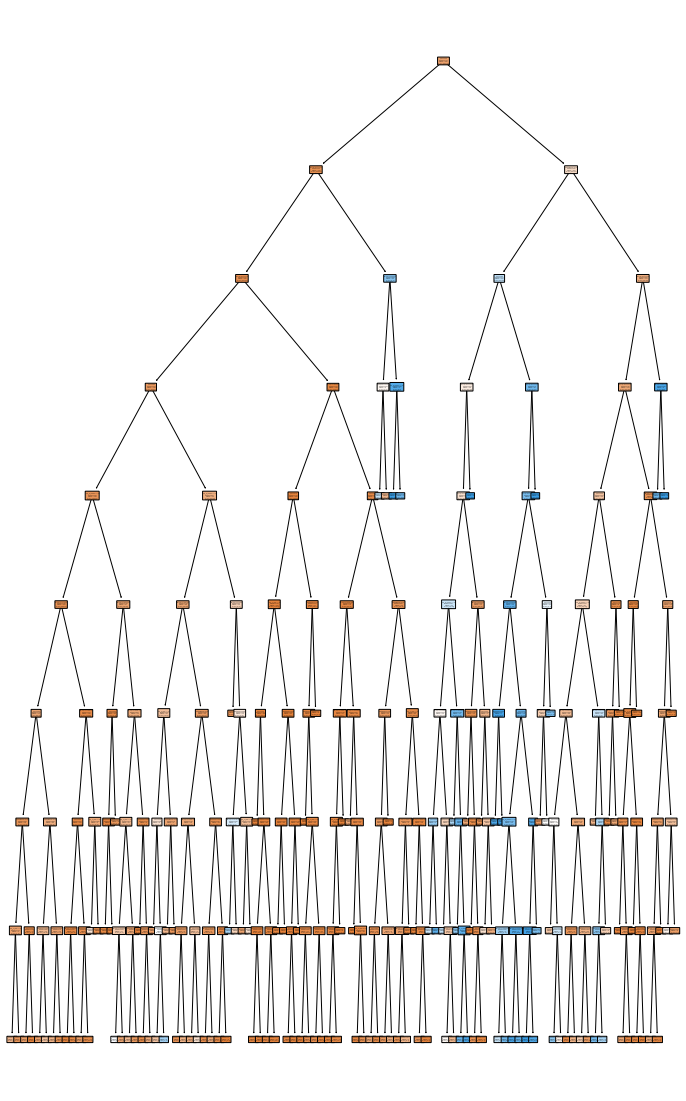

In [62]:
feature_names = transformer.get_feature_names()
class_names = ['Not Exited','Exited']

plt.figure(figsize=(12,20))
tree.plot_tree(model5,feature_names=feature_names,class_names=class_names,
              filled=True,rounded=True)
plt.show()

In [63]:
# install graphviz executable - http://graphviz.org/download/
# install python package = pip install graphviz

In [64]:
import os
os.environ['PATH'] +=os.pathsep+r"C:\Program Files\Graphviz\bin"

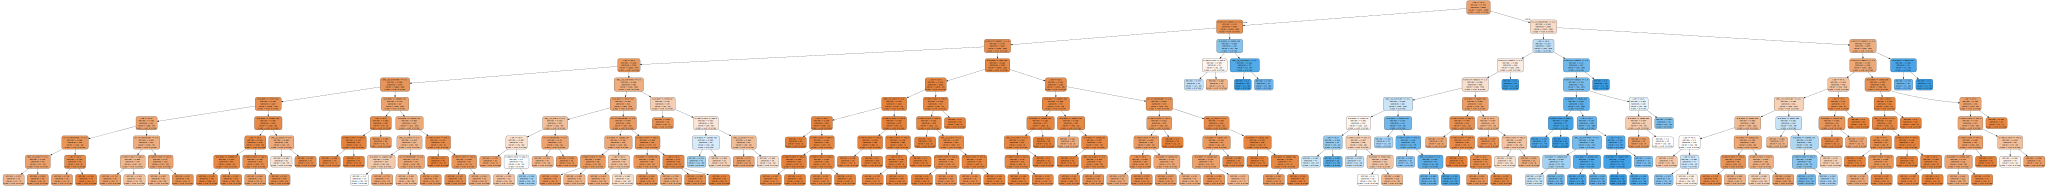

In [65]:
import graphviz

graphdata = tree.export_graphviz(model5,feature_names=feature_names,
                                class_names=class_names,rounded=True,filled=True)

graph = graphviz.Source(graphdata)
graph

In [66]:
graph.format = "PNG"
graph.render("myimage")

'myimage.png'

### Feature importances

In [67]:
model5.feature_importances_

array([0.04040587, 0.00200463, 0.01792196, 0.05236645, 0.37340876,
       0.14389479, 0.27879719, 0.09120035])

In [68]:
for i in range(len(feature_names)):print(feature_names[i],model5.feature_importances_[i])

ohe__x0_Germany 0.04040587191729324
ohe__x0_Spain 0.0020046345574216717
ohe__x1_Male 0.01792196305394969
CreditScore 0.05236644623570954
Age 0.373408755300357
Balance 0.1438947925721931
NumOfProducts 0.2787971860838908
IsActiveMember 0.09120035027918504


## Using class_weights

In [69]:
model5 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_leaf=10,max_leaf_nodes=40,
                                     min_samples_split=35,class_weight='balanced')
model5.fit(xtr,ytr)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, max_leaf_nodes=40, min_samples_leaf=10,
                       min_samples_split=35)

In [70]:
# performance on test data
ypred = model5.predict(xts)
print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1593
           1       0.46      0.78      0.58       407

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.83      0.77      0.79      2000



In [71]:
# performance on train data
ypred = model5.predict(xtr)
print(metrics.classification_report(ytr,ypred))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      6370
           1       0.47      0.79      0.59      1630

    accuracy                           0.77      8000
   macro avg       0.70      0.78      0.72      8000
weighted avg       0.84      0.77      0.79      8000



## Random Forest implementation

In [72]:
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(n_estimators=150, random_state=3,oob_score=True,class_weight='balanced',
                               max_depth=7,min_samples_leaf=15,min_samples_split=30,n_jobs=-1)

model6.fit(xtr,ytr)

RandomForestClassifier(class_weight='balanced', max_depth=7,
                       min_samples_leaf=15, min_samples_split=30,
                       n_estimators=150, n_jobs=-1, oob_score=True,
                       random_state=3)

In [73]:
# performance on test data
ypred = model6.predict(xts)
print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1593
           1       0.52      0.76      0.62       407

    accuracy                           0.81      2000
   macro avg       0.73      0.79      0.75      2000
weighted avg       0.85      0.81      0.82      2000



In [74]:
# performance on train data
ypred = model6.predict(xtr)
print(metrics.classification_report(ytr,ypred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      6370
           1       0.54      0.76      0.63      1630

    accuracy                           0.82      8000
   macro avg       0.74      0.80      0.76      8000
weighted avg       0.85      0.82      0.83      8000



In [75]:
model6.oob_score_

0.8055

In [76]:
model6.feature_importances_

array([0.06064817, 0.00745168, 0.02966563, 0.04264165, 0.43575437,
       0.09752032, 0.24072846, 0.0855897 ])

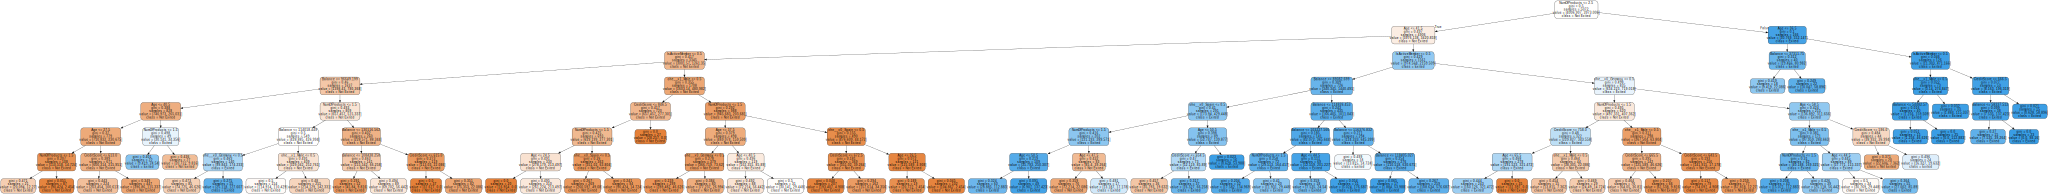

In [77]:
graphdata = tree.export_graphviz(model6[0],feature_names=feature_names,
                                class_names=class_names,rounded=True,filled=True)
graph = graphviz.Source(graphdata)
graph

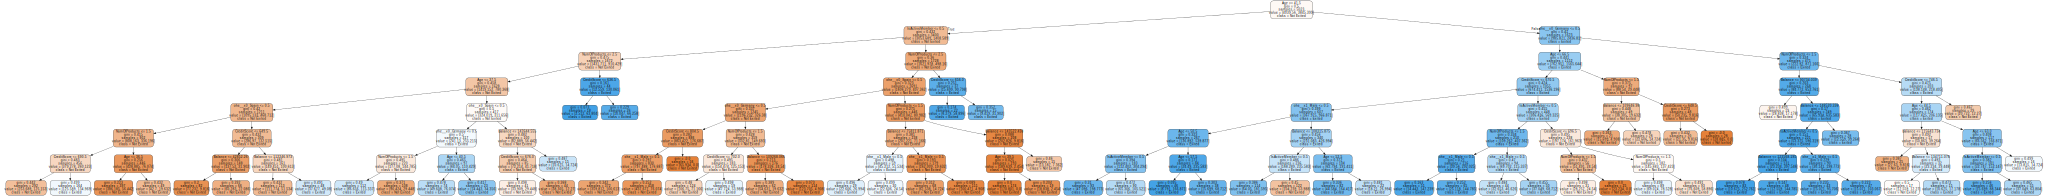

In [78]:
graphdata = tree.export_graphviz(model6[1],feature_names=feature_names,
                                class_names=class_names,rounded=True,filled=True)
graph = graphviz.Source(graphdata)
graph

In [79]:
5072/8000

0.634

## Implementation with Adaboost

In [80]:
from sklearn.ensemble import AdaBoostClassifier

model7 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(random_state=3,
                max_depth=1,class_weight='balanced'),n_estimators=250)

# train the model 
model7.fit(xtr,ytr)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=3),
                   n_estimators=250)

In [81]:
# performance on test data
ypred = model7.predict(xts)
print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1593
           1       0.48      0.75      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000



In [82]:
# performance on train data
ypred = model7.predict(xtr)
print(metrics.classification_report(ytr,ypred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      6370
           1       0.50      0.76      0.60      1630

    accuracy                           0.79      8000
   macro avg       0.71      0.78      0.73      8000
weighted avg       0.84      0.79      0.81      8000



In [83]:
model7[0]

DecisionTreeClassifier(class_weight='balanced', max_depth=1,
                       random_state=777756543)

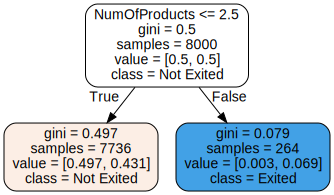

In [84]:
graphdata = tree.export_graphviz(model7[1],feature_names=feature_names,
                                class_names=class_names,rounded=True,filled=True)
graph = graphviz.Source(graphdata)
graph

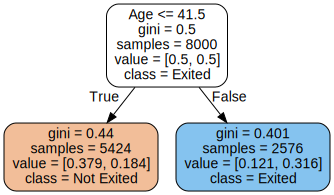

In [85]:
graphdata = tree.export_graphviz(model7[0],feature_names=feature_names,
                                class_names=class_names,rounded=True,filled=True)
graph = graphviz.Source(graphdata)
graph

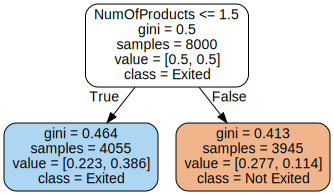

In [86]:
graphdata = tree.export_graphviz(model7[2],feature_names=feature_names,
                                class_names=class_names,rounded=True,filled=True)
graph = graphviz.Source(graphdata)
graph

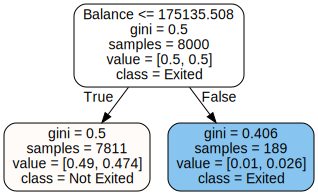

In [87]:
graphdata = tree.export_graphviz(model7[10],feature_names=feature_names,
                                class_names=class_names,rounded=True,filled=True)
graph = graphviz.Source(graphdata)
graph

### Implementation of GradientBoosting

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
model8 = GradientBoostingClassifier(n_estimators=500,learning_rate=0.01)
model8.fit(xtr,ytr)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)

In [89]:
# performance on test data
ypred = model8.predict(xts)
print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.80      0.44      0.57       407

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000



In [90]:
# performance on train data
ypred = model8.predict(xtr)
print(metrics.classification_report(ytr,ypred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6370
           1       0.80      0.46      0.58      1630

    accuracy                           0.87      8000
   macro avg       0.84      0.71      0.75      8000
weighted avg       0.86      0.87      0.85      8000



## XGBoost Implementation

In [91]:
# pip install xgboost

In [92]:
from xgboost import XGBClassifier

model9 = XGBClassifier(n_estimators=500)
model9.fit(xtr,ytr)

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [93]:
# performance on test data
ypred = model9.predict(xts)
print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1593
           1       0.64      0.50      0.57       407

    accuracy                           0.84      2000
   macro avg       0.76      0.72      0.73      2000
weighted avg       0.83      0.84      0.83      2000



In [94]:
# performance on train data
ypred = model9.predict(xtr)
print(metrics.classification_report(ytr,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6370
           1       1.00      0.97      0.99      1630

    accuracy                           0.99      8000
   macro avg       1.00      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000



## Stacking implementation

In [99]:
# pip install mlxtend

from mlxtend.classifier import StackingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


base1 = KNeighborsClassifier(n_neighbors=3)
base2 = RandomForestClassifier(n_estimators=300,random_state=3,class_weight='balanced')
base3 = DecisionTreeClassifier(class_weight='balanced')
base4 = AdaBoostClassifier(n_estimators=200)

meta = LogisticRegression()



model10 = StackingClassifier(classifiers=[base1,base2,base3,base4],meta_classifier=meta,
                             use_probas=True)
model10.fit(xtr,ytr)

StackingClassifier(classifiers=[KNeighborsClassifier(n_neighbors=3),
                                RandomForestClassifier(class_weight='balanced',
                                                       n_estimators=300,
                                                       random_state=3),
                                DecisionTreeClassifier(class_weight='balanced'),
                                AdaBoostClassifier()],
                   meta_classifier=LogisticRegression(), use_probas=True)

In [100]:
# performance on test data
ypred = model10.predict(xts)
print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1593
           1       0.52      0.55      0.53       407

    accuracy                           0.80      2000
   macro avg       0.70      0.71      0.70      2000
weighted avg       0.81      0.80      0.81      2000



In [101]:
# performance on train data
ypred = model10.predict(xtr)
print(metrics.classification_report(ytr,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

